<a href="https://colab.research.google.com/github/delicate99/Python_ML/blob/main/Cluster(KMEAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df=pd.read_csv('drive/MyDrive/DATA/CIA_Country_Facts.csv')

In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

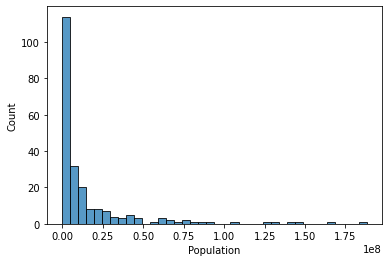

In [6]:
sns.histplot(data=df[df['Population']<200000000], x='Population')

In [7]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

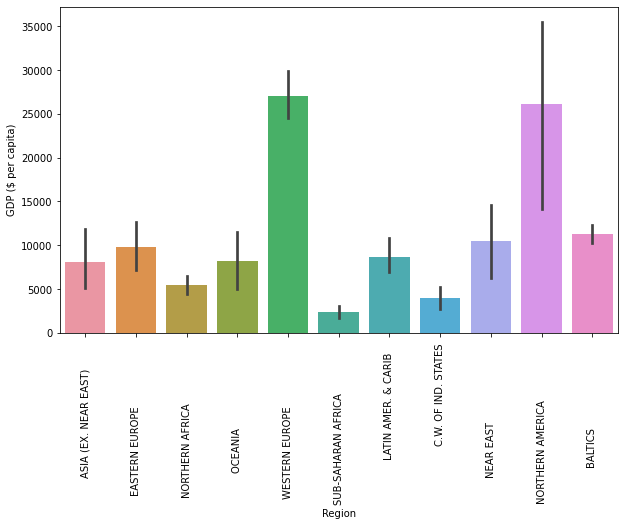

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, y='GDP ($ per capita)', x='Region')
plt.xticks(rotation=90)

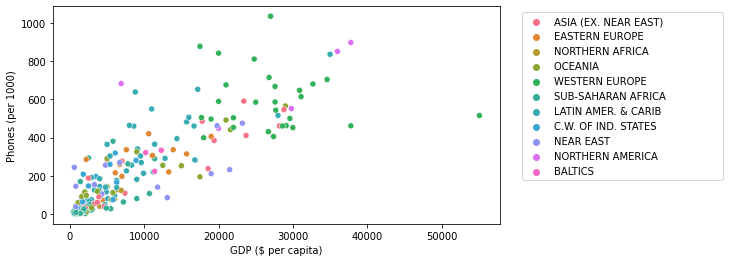

In [9]:
plt.figure(figsize=(8,4))
sns.scatterplot(data =df, x='GDP ($ per capita)',y='Phones (per 1000)', hue='Region')
plt.legend(loc=(1.05,0.2))

In [10]:
df[df['Phones (per 1000)']>900]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.0,7.75,5.43,27000.0,99.0,1035.6,0.0,0.0,100.0,NaN,9.19,12.91,0.17,NaN,NaN


In [11]:
df[df['GDP ($ per capita)']>50000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.0,8.97,4.81,55100.0,100.0,515.4,23.28,0.4,76.32,NaN,11.94,8.41,0.01,0.13,0.86


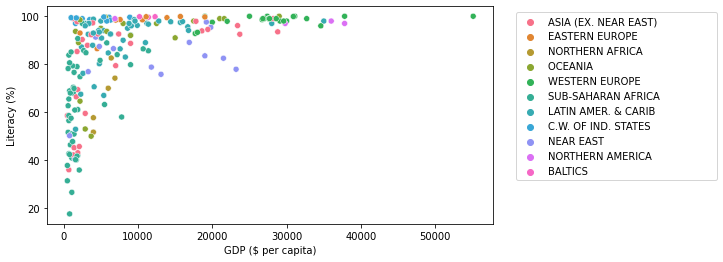

In [12]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Literacy (%)', hue='Region')
plt.legend(loc=(1.05, 0.2))

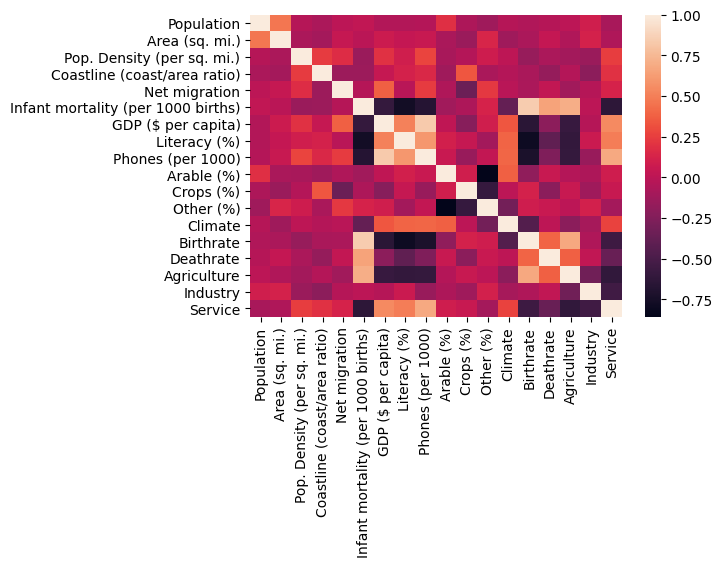

In [13]:
plt.figure(dpi=100)
sns.heatmap(df.corr())

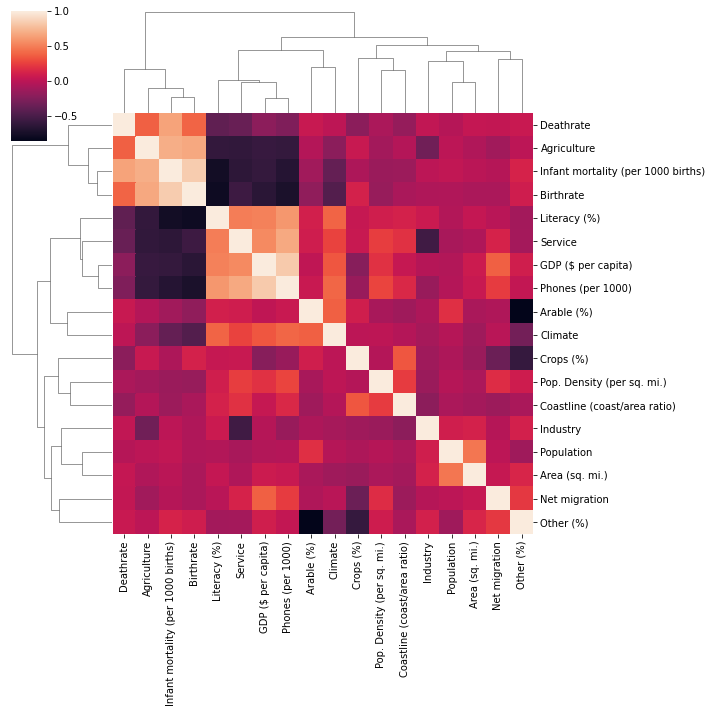

In [14]:
sns.clustermap(df.corr())

In [15]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [16]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [17]:
df[df['Agriculture'].isnull()]=df[df['Agriculture'].isnull()].fillna(0)

In [18]:
df[df['Agriculture'].isnull()]['Country']

Series([], Name: Country, dtype: object)

In [19]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [20]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [21]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [22]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [23]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [24]:
df= df.dropna()

In [25]:
X =df.drop('Country', axis=1)

In [26]:
X= pd.get_dummies(X)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler =StandardScaler()
scaled_X= scaler.fit_transform(X)

In [29]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

In [30]:
from sklearn.cluster import KMeans

In [31]:
ssd=[]

for k in range(2,30):

    model =KMeans(n_clusters =k)
    model.fit(scaled_X)

    ssd.append(model.inertia_)

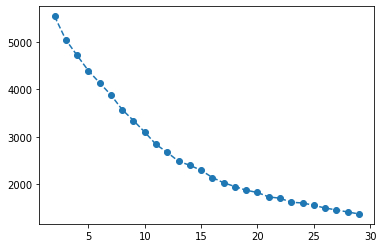

In [32]:
plt.plot(range(2,30), ssd, 'o--')

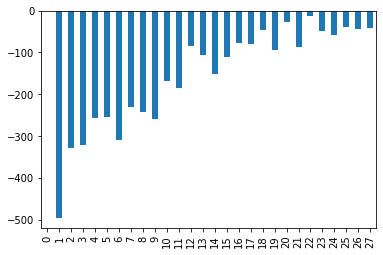

In [33]:
pd.Series(ssd).diff().plot(kind='bar')

In [34]:
model =KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
model.labels_

array([2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 1,
       1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2,
       0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2], dtype=int32)

In [36]:
X['K=3 Cluster Labels'] = model.labels_

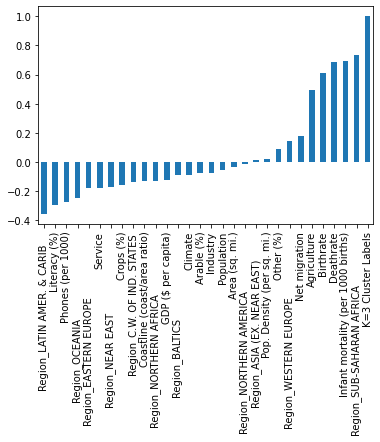

In [37]:
X.corr()['K=3 Cluster Labels'].sort_values().plot(kind='bar')

In [38]:
#!pip install plotly

In [42]:
iso_codes = pd.read_csv('drive/MyDrive/DATA/country_iso_codes.csv')

In [43]:
iso_codes.head()

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA


In [44]:
iso_map = iso_codes.set_index('Country')['ISO Code'].to_dict()

In [45]:
iso_map

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia': 'AUS',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia': 'BOL',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IO

In [48]:
df['ISO Code'] = df['Country'].map(iso_map)

In [49]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,ISO Code
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,ASM
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,AND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,1.666667,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630,NaN
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,0.00,99.98,1.0,0.00,0.00,0.000,0.000,0.400,NaN
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393,YEM
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489,ZMB


In [50]:
df['Cluster'] = model.labels_

In [53]:
import plotly.express as px

fig = px.choropleth(df, locations='ISO Code',
                    color ='Cluster', hover_name = 'Country')
fig.show()